In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

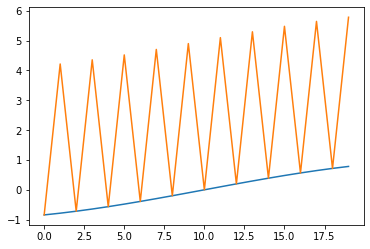

In [6]:
x = np.sin(np.arange(-1, 1, 0.1))
y = []
for i in range(len(x)):
    if i % 2==0:
        y.append(x[i])
    else:
        y.append(x[i]+5)
y = np.array(y)
plt.plot(x)
plt.plot(y)

In [7]:
np.corrcoef(x, y)

array([[1.        , 0.27866142],
       [0.27866142, 1.        ]])

In [8]:
print(pd.DataFrame([x, y]).T.corr(method="spearman"))
print(pd.DataFrame([x, y]).T.corr(method="pearson"))

          0         1
0  1.000000  0.571429
1  0.571429  1.000000
          0         1
0  1.000000  0.278661
1  0.278661  1.000000


In [2]:
import os
path1 = "D://新建文件夹//新建文件夹 (2)"                   # 输入一级文件夹地址
files1 = os.listdir(path1)           # 读入一级文件夹
num1 = len(files1)                   # 统计一级文件夹中的二级文件夹个数
num2 = []                            # 建立空列表
for i in range(num1):                # 遍历所有二级文件夹
    path2 = path1 +'//' +files1[i]   # 某二级文件夹的路径
    files2 = os.listdir(path2)       # 读入二级文件夹
    num2.append(len(files2))         # 二级文件夹中的文件个数
    
print("所有二级文件夹名:")
print(files1)                        # 打印二级文件夹名称
print("所有二级文件夹中的文件个数:")
print(num2)                          # 打印二级文件夹中的文件个数
print("总共文件个数：%s"%sum(num2))
print("对应输出:")
xinhua = dict(zip(files1,num2))      # 将二级文件夹名称和所含文件个数组合成字典
for key,value in xinhua.items():     # 将二级文件夹名称和所含文件个数对应输出
    print('{key}:{value}'.format(key = key, value = value))

所有二级文件夹名:
['2012__07', '2017__09', '2018__01', '2018__02', '2018__03', '2018__06', '2018__08', '2018__09', '2018__12', '2019__01', '2019__05', '2019__06', '2019__08', '2019__09', '2019__10', '2019__11', '2019__12', '2020__01', '2020__02', '2020__03', '2020__04', '2020__05', '2020__06', '2020__07', '2020__08', '2020__09', '2020__10', '2020__11', '2020__12', '2021__01', '2021__02', '2021__03', '2021__04', '2021__05', '2021__06', '2021__07', '2021__08', '2021__09', '2021__10', '2021__11', '2021__12', '2022__01', '2022__02', '2022__03', '2022__04', '2022__05', '2022__06', '2022__07', '2022__08', '2022__09', '2022__10', '2022__11', '2022__12', '2023__01', '2023__02', '2023__03', '2023__04', '2023__05']
所有二级文件夹中的文件个数:
[13, 1, 1, 1, 1, 4, 3, 2, 1, 2, 1, 2, 4, 6, 1, 28, 4, 3, 3, 5, 6, 1, 18, 9, 7, 10, 24, 10, 14, 20, 37, 43, 261, 950, 173, 166, 350, 81, 294, 306, 367, 111, 286, 151, 86, 57, 122, 89, 327, 380, 201, 111, 65, 164, 163, 215, 1832, 84]
总共文件个数：7677
对应输出:
2012__07:13
2017__09:1
2018_

In [21]:
import subprocess
import os
import io
import whatimage
import pillow_heif
import traceback
from PIL import Image
from pillow_heif import register_heif_opener

register_heif_opener()
 
def decodeImage(bytesIo, sub_path):
    try:
        fmt = whatimage.identify_image(bytesIo)
        # print('fmt = ', fmt)
        if fmt in ['heic']:
            print(sub_path)
            # i = pillow_heif.read_heif(sub_path)
            # print('i = ', i)
            # print('i.data = ', i.data)
            pi = Image.open(sub_path)
            # print('pi = ', pi)
            pi.save('%s.jpg'%sub_path.split(".")[0])
            os.remove(sub_path)
    except:
        traceback.print_exc()
 
 
def read_image_file_rb(file_path):
    with open(file_path, 'rb') as f:
        file_data = f.read()
    return file_data
 
 
if __name__ == "__main__":
    origin_file_path = r'D:\新建文件夹\新建文件夹 (2)'
    print('file_path = ', file_path)
    all_num = 0
    if os.path.isdir(origin_file_path):
        for file_idx, o_file_path in enumerate(os.listdir(origin_file_path)):
            num = 0
            file_path = os.path.join(origin_file_path, o_file_path)
            if os.path.isdir(file_path):
                for idx, file in enumerate(os.listdir(file_path)):
                    sub_path = os.path.join(file_path, file)
                    if ".AAE" in file or ".aae" in file:
                        os.remove(sub_path)
                        continue 
                    all_num += 1
                    num += 1
                    if ".heic" not in file and ".HEIC" not in file:
                        continue 
                    data = read_image_file_rb(sub_path)
                    decodeImage(data, sub_path)
            print(file_path, " 图片数量: %s"%(num))
        print("总共图片数量: %s"%all_num)

file_path =  D:\新建文件夹\新建文件夹 (2)\2021__05
D:\新建文件夹\新建文件夹 (2)\2012__07  图片数量: 12
D:\新建文件夹\新建文件夹 (2)\2017__09  图片数量: 1
D:\新建文件夹\新建文件夹 (2)\2018__01  图片数量: 1
D:\新建文件夹\新建文件夹 (2)\2018__02  图片数量: 1
D:\新建文件夹\新建文件夹 (2)\2018__03  图片数量: 1
D:\新建文件夹\新建文件夹 (2)\2018__06  图片数量: 4
D:\新建文件夹\新建文件夹 (2)\2018__08  图片数量: 3
D:\新建文件夹\新建文件夹 (2)\2018__09  图片数量: 2
D:\新建文件夹\新建文件夹 (2)\2018__12  图片数量: 1
D:\新建文件夹\新建文件夹 (2)\2019__01  图片数量: 2
D:\新建文件夹\新建文件夹 (2)\2019__05  图片数量: 1
D:\新建文件夹\新建文件夹 (2)\2019__06  图片数量: 2
D:\新建文件夹\新建文件夹 (2)\2019__08  图片数量: 4
D:\新建文件夹\新建文件夹 (2)\2019__09  图片数量: 6
D:\新建文件夹\新建文件夹 (2)\2019__10  图片数量: 1
D:\新建文件夹\新建文件夹 (2)\2019__11  图片数量: 28
D:\新建文件夹\新建文件夹 (2)\2019__12  图片数量: 4
D:\新建文件夹\新建文件夹 (2)\2020__01  图片数量: 3
D:\新建文件夹\新建文件夹 (2)\2020__02  图片数量: 3
D:\新建文件夹\新建文件夹 (2)\2020__03  图片数量: 5
D:\新建文件夹\新建文件夹 (2)\2020__04  图片数量: 6
D:\新建文件夹\新建文件夹 (2)\2020__05  图片数量: 1
D:\新建文件夹\新建文件夹 (2)\2020__06  图片数量: 18
D:\新建文件夹\新建文件夹 (2)\2020__07  图片数量: 9
D:\新建文件夹\新建文件夹 (2)\2020__08  图片数量: 7
D:\新建文件夹\新建文件夹 (2)\2020__09  图片

In [8]:
! pip install pillow_heif

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
